In [2]:
# importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [9]:
# Data preprocessing , collection and analysis

customer_data=pd.read_csv('Mall_Customers.csv')
customer_data.head()
customer_data.shape
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# checking for missing value
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# find correlation between data 
correlation= customer_data.corr()

<AxesSubplot:>

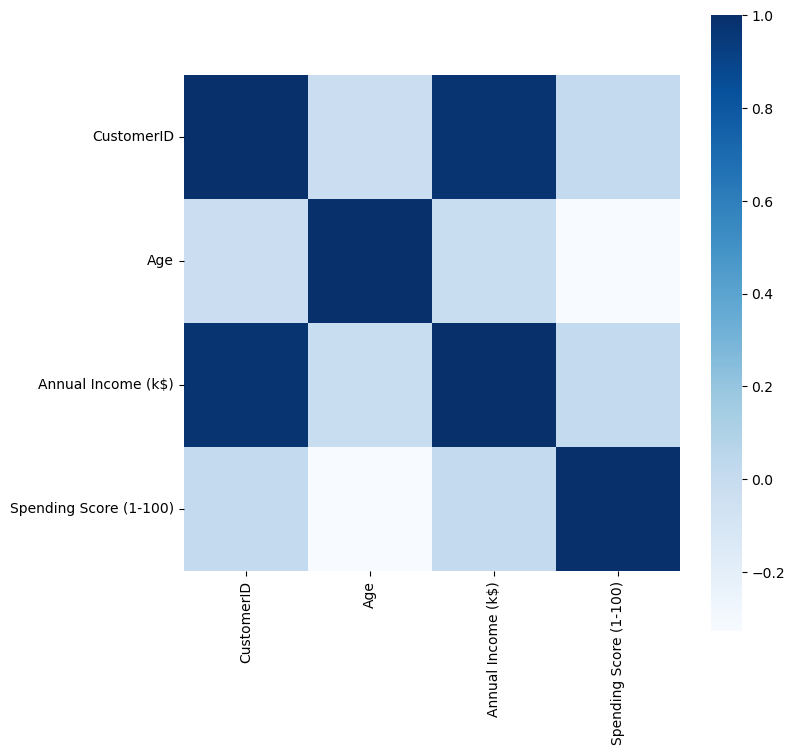

In [13]:
# constructing the heat maps to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [17]:
# from heat map we can choose annual income and spending score as feature for study

x=customer_data.iloc[:,[3,4]].values

print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [20]:
# choosing the  number of clusters by wcss --within cluster sum of square 
# finding wcss value for different number of clusters

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=44)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)
    


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


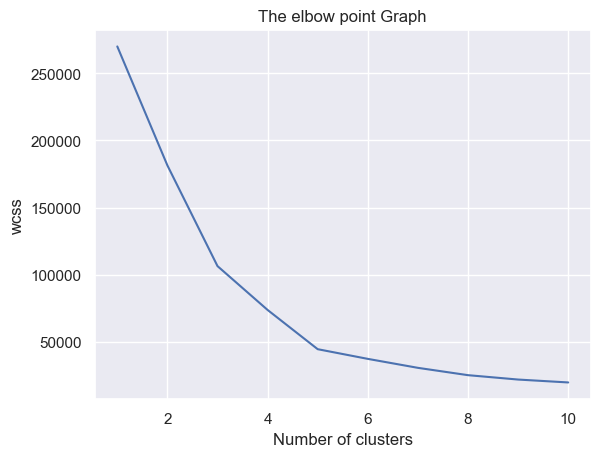

In [21]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The elbow point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [22]:
# optimum number of clusters = 5


In [27]:
# Traiiaing the k-means clustering model (k=5)

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=14)

# return a label for each data point based on the clusters
y=kmeans.fit_predict(x)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


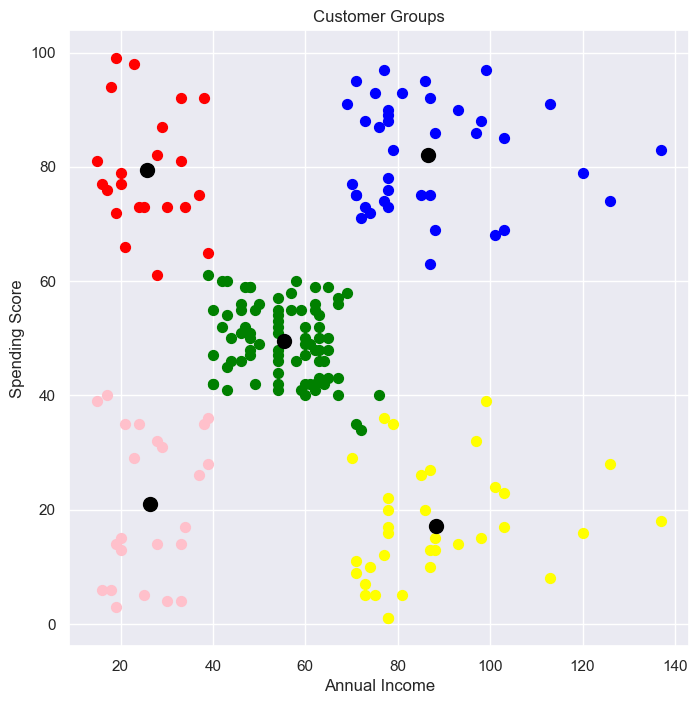

In [36]:
# visualizing all the clusters , plotting all the clusters and their centtroid

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c="green",label="cluster 1")
plt.scatter(x[y==1,0],x[y==1,1],s=50,c="blue",label="cluster 2")
plt.scatter(x[y==2,0],x[y==2,1],s=50,c="red",label="cluster 3")
plt.scatter(x[y==3,0],x[y==3,1],s=50,c="yellow",label="cluster 4")
plt.scatter(x[y==4,0],x[y==4,1],s=50,c="pink",label="cluster 5")

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label="centroids")
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

